In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\JYB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# FinanceDataReader 에서 대한항공 데이터 가지고 오기(5년)
df = fdr.DataReader("003490","2018-01-01","2023-07-31")
df_koreaair = df[["Close"]]
df_koreaair

,Close
Date,
2018-01-02,23278
2018-01-03,23181
2018-01-04,22630
2018-01-05,22630
2018-01-08,23408
...,...
2023-07-25,24750
2023-07-26,24150
2023-07-27,24700


In [3]:
# 유가 데이터 가져오기
# 서부 텍사스 중질유(WTI Crude), monthly
df_oil = pdr.DataReader('POILDUBUSDM', 'fred', start='2018-01-01')

df_oil.tail(10)
df_oil.columns = ["유가데이터"]
df_oil

,유가데이터
DATE,
2018-01-01,66.024783
2018-02-01,62.631000
2018-03-01,63.917273
2018-04-01,68.667143
2018-05-01,74.077826
...,...
2023-06-01,74.729545
2023-07-01,80.645714
2023-08-01,86.123043


In [4]:
# 환율 데이터 들고오기

df_ex = fdr.DataReader("USD/KRW","2018-01-01","2023-07-31")
df_ex = df_ex[["Close"]]
df_ex

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# 코스피 지수
df_kospi = fdr.DataReader("KS11","2018-01-01","2023-07-31")
df_kospi = df_kospi[["Close"]]
df_kospi

,Close
Date,
2018-01-02,2479.649902
2018-01-03,2486.350098
2018-01-04,2466.459961
2018-01-05,2497.520020
2018-01-08,2513.280029
...,...
2023-07-24,2628.530029
2023-07-25,2636.459961
2023-07-26,2592.360107


In [ ]:
# 10년만기 한국국채 수익률 2018.01.01~2023.07.31 - 출처 investing.com
df_bond = pd.read_csv("./한국 10년 수익률.csv")
df_bond["날짜"] = pd.to_datetime(df_bond["날짜"])
df_bond.set_index('날짜',inplace=True)
df_bond = df_bond[["종가"]]
df_bond

,종가
날짜,
2023-07-31,3.758
2023-07-30,3.731
2023-07-29,3.731
2023-07-28,3.727
2023-07-27,3.637
...,...
2018-01-06,2.515
2018-01-05,2.519
2018-01-04,2.523


In [ ]:
# 월말 데이터로 변경
df_koreaair  = df_koreaair.resample('M').last()
df_oil  = df_oil.resample('M').last()
df_kospi  = df_kospi.resample('M').last()
df_ex  = df_ex.resample('M').last()
df_bond  = df_bond.resample('M').last()

In [ ]:
df_koreaair["월수익률_대한항공"] = df_koreaair["Close"].pct_change()
df_koreaair.dropna(inplace=True)
df_koreaair.reset_index(inplace=True)
df_koreaair

,Date,Close,월수익률_대한항공
0,2018-02-28,21171,-0.153024
1,2018-03-31,21916,0.035190
2,2018-04-30,22144,0.010403
3,2018-05-31,20717,-0.064442
4,2018-06-30,18318,-0.115799
...,...,...,...
61,2023-03-31,23200,0.019780
62,2023-04-30,22850,-0.015086
63,2023-05-31,22100,-0.032823
64,2023-06-30,24350,0.101810


In [ ]:
df_oil["월수익률_유가"] = df_oil["유가데이터"].pct_change()
df_oil.dropna(inplace=True)
df_oil.reset_index(inplace=True)
df_oil

,DATE,유가데이터,월수익률_유가
0,2018-02-28,62.631000,-0.051402
1,2018-03-31,63.917273,0.020537
2,2018-04-30,68.667143,0.074313
3,2018-05-31,74.077826,0.078796
4,2018-06-30,73.311429,-0.010346
...,...,...,...
64,2023-06-30,74.729545,-0.000797
65,2023-07-31,80.645714,0.079168
66,2023-08-31,86.123043,0.067918
67,2023-09-30,93.238571,0.082620


In [ ]:
df_kospi["월수익률_코스피"] = df_kospi["Close"].pct_change()
df_kospi.dropna(inplace=True)
df_kospi.reset_index(inplace=True)
df_kospi

,Date,Close,월수익률_코스피
0,2018-02-28,2427.360107,-0.054199
1,2018-03-31,2445.850098,0.007617
2,2018-04-30,2515.379883,0.028428
3,2018-05-31,2423.010010,-0.036722
4,2018-06-30,2326.129883,-0.039983
...,...,...,...
61,2023-03-31,2476.860107,0.026529
62,2023-04-30,2501.530029,0.009960
63,2023-05-31,2577.120117,0.030218
64,2023-06-30,2564.280029,-0.004982


In [ ]:
df_ex["월수익률_환율"] = df_ex["Close"].pct_change()
df_ex.dropna(inplace=True)
df_ex.reset_index(inplace=True)
df_ex

,Date,Close,월수익률_환율
0,2018-02-28,1079.390015,0.006387
1,2018-03-31,1062.000000,-0.016111
2,2018-04-30,1067.599976,0.005273
3,2018-05-31,1075.030029,0.006960
4,2018-06-30,1120.540039,0.042334
...,...,...,...
61,2023-03-31,1296.500000,-0.016574
62,2023-04-30,1339.390015,0.033081
63,2023-05-31,1319.790039,-0.014634
64,2023-06-30,1323.069946,0.002485


In [ ]:
df_bond["월수익률_금리"] = df_bond["종가"].pct_change()
df_bond.dropna(inplace=True)
df_bond.reset_index(inplace=True)
df_bond

,날짜,종가,월수익률_금리
0,2018-02-28,2.736,-0.011918
1,2018-03-31,2.622,-0.041667
2,2018-04-30,2.712,0.034325
3,2018-05-31,2.694,-0.006637
4,2018-06-30,2.555,-0.051596
...,...,...,...
61,2023-03-31,3.333,-0.111437
62,2023-04-30,3.367,0.010201
63,2023-05-31,3.532,0.049005
64,2023-06-30,3.697,0.046716


In [ ]:
# 데이터 합치기 
df_all = pd.concat([df_koreaair["월수익률_대한항공"],df_oil["월수익률_유가"],df_kospi["월수익률_코스피"],df_ex["월수익률_환율"],df_bond["월수익률_금리"]],axis=1)
df_all.dropna(inplace=True)
df_all

,월수익률_대한항공,월수익률_유가,월수익률_코스피,월수익률_환율,월수익률_금리
0,-0.153024,-0.051402,-0.054199,0.006387,-0.011918
1,0.035190,0.020537,0.007617,-0.016111,-0.041667
2,0.010403,0.074313,0.028428,0.005273,0.034325
3,-0.064442,0.078796,-0.036722,0.006960,-0.006637
4,-0.115799,-0.010346,-0.039983,0.042334,-0.051596
...,...,...,...,...,...
61,0.019780,-0.036963,0.026529,-0.016574,-0.111437
62,-0.015086,0.065639,0.009960,0.033081,0.010201
63,-0.032823,-0.103339,0.030218,-0.014634,0.049005
64,0.101810,-0.000797,-0.004982,0.002485,0.046716


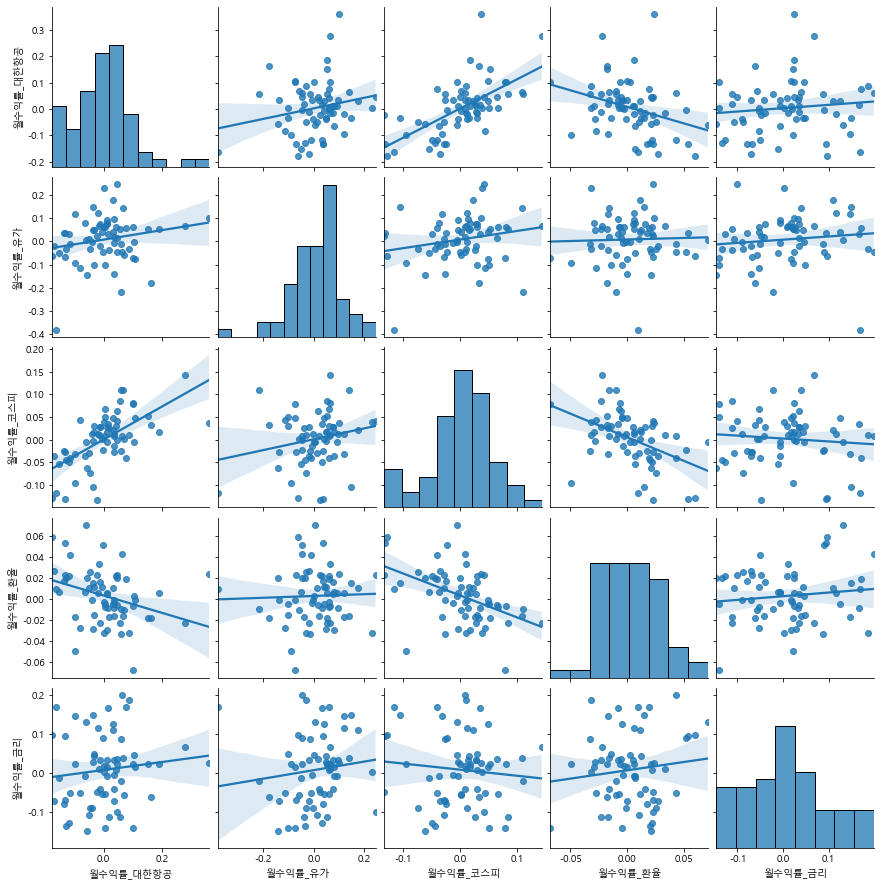

In [ ]:
# pairplot 확인
sns.pairplot(df_all, kind='reg')

In [ ]:
# 상관계수 확인
import scipy.stats

df_all.corr()

,월수익률_대한항공,월수익률_유가,월수익률_코스피,월수익률_환율,월수익률_금리
월수익률_대한항공,1.000000,0.202240,0.637220,-0.323430,0.113687
월수익률_유가,0.202240,1.000000,0.210822,0.033573,0.122897
월수익률_코스피,0.637220,0.210822,1.000000,-0.467497,-0.099760
월수익률_환율,-0.323430,0.033573,-0.467497,1.000000,0.121760
월수익률_금리,0.113687,0.122897,-0.099760,0.121760,1.000000


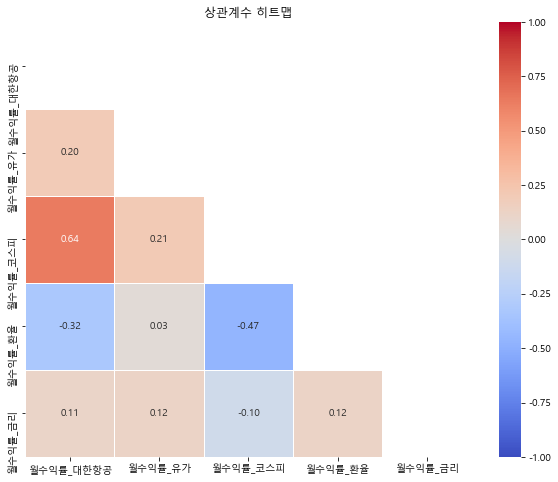

In [ ]:
# hitmap 시각화
correlation_matrix = df_all.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmin=-1, vmax=1)
plt.title('상관계수 히트맵')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression #로지스틱 회귀 가져오기
logistic = LogisticRegression(max_iter=10000) 

In [ ]:
# map을 이용한 데이터 변환
def transform_value(value):
    if value > 0:
        return 1
    else:
        return 0
    
df_all['월수익률_대한항공'] = df_all['월수익률_대한항공'].map(transform_value)
df_all

,월수익률_대한항공,월수익률_유가,월수익률_코스피,월수익률_환율,월수익률_금리
0,0,-0.051402,-0.054199,0.006387,-0.011918
1,1,0.020537,0.007617,-0.016111,-0.041667
2,1,0.074313,0.028428,0.005273,0.034325
3,0,0.078796,-0.036722,0.006960,-0.006637
4,0,-0.010346,-0.039983,0.042334,-0.051596
...,...,...,...,...,...
61,1,-0.036963,0.026529,-0.016574,-0.111437
62,0,0.065639,0.009960,0.033081,0.010201
63,0,-0.103339,0.030218,-0.014634,0.049005
64,1,-0.000797,-0.004982,0.002485,0.046716


In [ ]:
target = df_all['월수익률_대한항공']
feature = df_all[['월수익률_유가', '월수익률_코스피', '월수익률_환율', '월수익률_금리']]

In [ ]:
import statsmodels.api as sm

logreg = sm.Logit(target, feature).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.422813
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              월수익률_대한항공   No. Observations:                   66
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3863
Time:                        16:51:04   Log-Likelihood:                -27.906
converged:                       True   LL-Null:                       -45.475
Covariance Type:            nonrobust   LLR p-value:                 1.139e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
월수익률_유가        0.8343      4.014      0.208      0.835      -7.034       8.703
월수익률_코스피      37.6126     10.918      3.445      0.001      16.213      59.012
월수익률_환율      -19.6614     14.855     -1.324      0.186     -48.777       9.454
월수익률_금리        5.5279      4.149      1.332      0.183      -2.603      13.659
==============================================================================
"""